<a href="https://colab.research.google.com/github/Isurie/Text-Classification-Module/blob/master/Feature_extraction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install sinling

In [ ]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

In [ ]:
import pandas as pd
import numpy as np
import torch
import re
import tqdm
from matplotlib._path import (affine_transform, count_bboxes_overlapping_bbox,
     update_path_extents)

from gensim.models import Word2Vec
from nltk import word_tokenize, pos_tag, pos_tag_sents

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned data-2.csv to cleaned data-2.csv


In [ ]:
df = pandas.read_csv('testdata-domains-balanced.csv')
print(df.head(11))

                                                                                                                                                                                                            Text  ...                                                                                                                     Filtered_sentence
0                                                                                          SriLankanPolitics පෙනි පෙනී සිදුවන විකිණිම සහ මිලට ගැනීම හමුවේ හුරේ දාන මොඩ ඡන්ද දායකයන් දුටුවිට  අහෝ අප සිරබත් කෑවේ…  ...                                     ෂ්‍රී ලංකන් දේෂපාලන පෙ පෙන සිදුව විකිනි මිල ගැනී හම හුර දාන මොඩ චන් දායක දුටුවි අහෝ අප සිරබ කෑවේ…
1                                                                                                              lanka C news  රනිල් අගමැති කරන්න යෝජනාවක් පාර්ලිමේන්තුවට  වැනිදා ඡන්ද විමසීමක් දෙමල සන්ධානයත් පක   ...                                                                      රනිල අගමැ කර යෝජනාව ප

In [ ]:
df.groupby('Class')['Text'].nunique()

Class
Neutral      150
Political    146
Racist       149
Religion     150
Sexism       149
sports       150
Name: Text, dtype: int64

In [ ]:
def clean_data(dataframe):
    # Drop duplicate rows
    dataframe.drop_duplicates(subset='Text', inplace=True)

clean_data(df)
df.to_csv('testdata-domains.csv')

**1. Dataset preparation**

In [ ]:
df = pandas.read_csv('cleaned data-2.csv')
print(df.head(11))


    Id  ...                                  Filtered_sentence
0    0  ...  දින එකාබද්ධ විපක්ෂ මාධ්‍ ලේක රේනුක පෙරේර මහත න...
1    1  ...  මා එක්සත් ජාතික පක්ෂ එකාබද්ධ විපක්ෂ පවති කිසි ...
2    2  ...               කිම තර කොහේද විද ගල උරන මා මිතුර පරය
3    3  ...               එහෙ කොහොම උනේ 😂😂 පරය අපි අය කරල නේ 😂
4    4  ...   විමල ගොන වගෙ  එකෙ මෑරෙ හද පරය රටට වෑඩ කර යකො හොර
5    5  ...  ලැජ්ජ ස⁣හෝදර විදිහ දැක්කා ඔබ කුලල්කෑ වාසි ග තම...
6    6  ...  ලැජ්ජ ස⁣හෝදර විදිහ දැක්කා ඔබ කුලල්කෑ වාසි ග තම...
7    7  ...  මං තම්බි වගේ පෙන්නෙ😏 මං බ්‍රහස්පතින්ද ගෙදර එන්...
8    8  ...  ඉටි බං උතුර ඉල්ලනසෙට එක නැගෙනහිරපඉල්ල තම්බි සෙ...
9    9  ...  පේනවාන තම්බි කවද ඉ උන් වාසි පැත්ත එහෙ ඉදගෙ උ ෂ...
10  10  ...  ඉතිහාස ඉදිරි මෙ හෙලිදරවුව කිරීම අවකාෂ ද අප ප්‍...

[11 rows x 4 columns]


In [ ]:
trainDF = pandas.read_csv('cleaned data-2.csv')
print(trainDF['Filtered_sentence'].head(11))
trainDF['Filtered_sentence']=trainDF['Filtered_sentence'].values.astype('U')

# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['Filtered_sentence'], trainDF['Class'])

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

0     දින එකාබද්ධ විපක්ෂ මාධ්‍ ලේක රේනුක පෙරේර මහත න...
1     මා එක්සත් ජාතික පක්ෂ එකාබද්ධ විපක්ෂ පවති කිසි ...
2                  කිම තර කොහේද විද ගල උරන මා මිතුර පරය
3                  එහෙ කොහොම උනේ 😂😂 පරය අපි අය කරල නේ 😂
4      විමල ගොන වගෙ  එකෙ මෑරෙ හද පරය රටට වෑඩ කර යකො හොර
5     ලැජ්ජ ස⁣හෝදර විදිහ දැක්කා ඔබ කුලල්කෑ වාසි ග තම...
6     ලැජ්ජ ස⁣හෝදර විදිහ දැක්කා ඔබ කුලල්කෑ වාසි ග තම...
7     මං තම්බි වගේ පෙන්නෙ😏 මං බ්‍රහස්පතින්ද ගෙදර එන්...
8     ඉටි බං උතුර ඉල්ලනසෙට එක නැගෙනහිරපඉල්ල තම්බි සෙ...
9     පේනවාන තම්බි කවද ඉ උන් වාසි පැත්ත එහෙ ඉදගෙ උ ෂ...
10    ඉතිහාස ඉදිරි මෙ හෙලිදරවුව කිරීම අවකාෂ ද අප ප්‍...
Name: Filtered_sentence, dtype: object


In [ ]:
train_x.nunique()

1242

**2. Feature Engineering**

2.1 Count Vectors as features

In [ ]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDF['Filtered_sentence'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [ ]:
# Printing the identified Unique words along with their indices
print("Vocabulary: ", count_vect.vocabulary_)
  
# Encode the Document
vector = count_vect.transform(trainDF['Filtered_sentence'])


2.2 TF-IDF Vectors as features

In [ ]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(trainDF['Filtered_sentence'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(trainDF['Filtered_sentence'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(trainDF['Filtered_sentence'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [ ]:
print("word level tf-idf_Vocabulary: ", tfidf_vect.vocabulary_)
print("ngram level tf-idf_Vocabulary: ", tfidf_vect_ngram.vocabulary_)
print("characters level tf-idf_Vocabulary: ", tfidf_vect_ngram_chars.vocabulary_)

In [ ]:
print(xvalid_tfidf_ngram)

**3. Model Building**

In [ ]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

3.1 Multinominal Naive Bayes

In [ ]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print("NB, Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("NB, CharLevel Vectors: ", accuracy)

NB, Count Vectors:  0.7813333333333333
NB, WordLevel TF-IDF:  0.792
NB, N-Gram Vectors:  0.92
NB, CharLevel Vectors:  0.88


In [ ]:
# Bernoulli Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.BernoulliNB(), xtrain_count, train_y, xvalid_count)
print("BernoulliNB, Count Vectors: ", accuracy)

# Bernoulli Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.BernoulliNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("BernoulliNB, WordLevel TF-IDF: ", accuracy)

# Bernoulli Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.BernoulliNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("BernoulliNB, N-Gram Vectors: ", accuracy)

# Bernoulli Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.BernoulliNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("BernoulliNB, CharLevel Vectors: ", accuracy)

BernoulliNB, Count Vectors:  0.7413333333333333
BernoulliNB, WordLevel TF-IDF:  0.7413333333333333
BernoulliNB, N-Gram Vectors:  0.8186666666666667
BernoulliNB, CharLevel Vectors:  0.848


### 3.2 Logistic Regression-Linear Classifier

In [ ]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print ("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("LR, CharLevel Vectors: ", accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LR, Count Vectors:  0.9013333333333333
LR, WordLevel TF-IDF:  0.8213333333333334
LR, N-Gram Vectors:  0.9573333333333334
LR, CharLevel Vectors:  0.9306666666666666


### 3.3 Support Vector Machine

In [ ]:
# SVM on Count Vectors
accuracy = train_model(svm.SVC(), xtrain_count, train_y, xvalid_count)
print ("SVM, Count Vectors: ", accuracy)

# SVM on Ngram Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("SVM, Ngram Level TF IDF Vectors: ", accuracy)

# SVM on Word Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("SVM, Word Level TF IDF Vectors: ", accuracy)

# SVM on Character Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("SVM, Character Level TF IDF Vectors: ", accuracy)

SVM, Count Vectors:  0.7413333333333333
SVM, Ngram Level TF IDF Vectors:  0.968
SVM, Word Level TF IDF Vectors:  0.9146666666666666
SVM, Character Level TF IDF Vectors:  0.9653333333333334


### 3.4 Random Forest - Bagging Model

In [ ]:
# RF on Count Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print ("RF, Count Vectors: ", accuracy)

# RF on Word Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("RF, WordLevel TF-IDF: ", accuracy)

# RF on Ngram Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("RF, gram Level TF-IDF: ", accuracy)

# RF on Character Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("RF, Character Level TF IDF: ", accuracy)

RF, Count Vectors:  0.9466666666666667
RF, WordLevel TF-IDF:  0.9466666666666667
RF, gram Level TF-IDF:  0.9573333333333334
RF, Character Level TF IDF:  0.9626666666666667


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# KNN on Count Vectors
accuracy = train_model(KNeighborsClassifier(n_neighbors=17, p=5,metric='euclidean'), xtrain_count, train_y, xvalid_count)
print ("KNN, Count Vectors: ", accuracy)

# KNN on Word Level TF IDF Vectors
accuracy = train_model(KNeighborsClassifier(n_neighbors=17, p=5,metric='euclidean'), xtrain_tfidf, train_y, xvalid_tfidf)
print ("KNN, WordLevel TF-IDF: ", accuracy)

# KNN on Ngram Level TF IDF Vectors
accuracy = train_model(KNeighborsClassifier(n_neighbors=200, p=5,metric='euclidean'), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("KNN, Ngram Level TF-IDF: ", accuracy)

# KNN on Character Level TF IDF Vectors
accuracy = train_model(KNeighborsClassifier(n_neighbors=12, p=5,metric='euclidean'), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("KNN, Character Level TF IDF: ", accuracy)

KNN, Count Vectors:  0.4746666666666667
KNN, WordLevel TF-IDF:  0.624
KNN, Ngram Level TF-IDF:  0.6506666666666666
KNN, Character Level TF IDF:  0.7946666666666666


In [ ]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

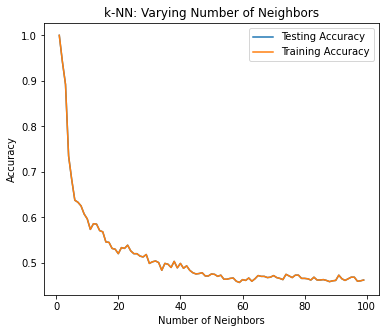

In [ ]:
plt.rcParams["figure.figsize"] = (6,5)

knn = KNeighborsClassifier(n_neighbors=7)  
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(xtrain_count,train_y)

no_neighbors = np.arange(1, 100)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(xtrain_count,train_y)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(xtrain_count,train_y)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(xtrain_count,train_y)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

2.3 Text / NLP based features

In [ ]:
# tokenization
from sinling import SinhalaTokenizer as tokenizer,SinhalaStemmer as stemmer, POSTagger,preprocess, word_joiner,word_splitter
from collections import Counter
from itertools import chain
df = pandas.read_csv('testdata-domains-balanced.csv')
df['Text'] = df['Text'].apply(word_tokenize).tolist()

# POS tagging
tagger = POSTagger()
df['Text'] = tagger.predict(df['Text'].tolist())
df['Text'] = pd.Series(df['Text'].tolist())

# Use collections.Counter and itertools.chain to flatten the list of list-> get the POS vocabulary
tokens, tags = zip(*chain(*df['Text'].tolist()))
possible_tags = sorted(set(tags))
possible_tags_counter = Counter({p:0 for p in possible_tags})

# Iterate through each tagged sentence and get the counts of POS
df['Text'].apply(lambda x: Counter(list(zip(*x))[1]))
df['pos_counts'] = df['Text'].apply(lambda x: Counter(list(zip(*x))[1]))
df['pos_counts']

# Add in the POS that don't appears in the sentence with 0 counts
def add_pos_with_zero_counts(counter, keys_to_add):
        for k in keys_to_add:
            counter[k] = counter.get(k, 0)
        return counter

# Flatten the values into the list
df['pos_counts'].apply(lambda x: add_pos_with_zero_counts(x, possible_tags))
df['pos_counts_with_zero'] = df['pos_counts'].apply(lambda x: add_pos_with_zero_counts(x, possible_tags))

df['pos_counts_with_zero'].apply(lambda x: [count for tag, count in sorted(x.most_common())])

# Get the pos count vector 
df['sent_vector'] = df['pos_counts_with_zero'].apply(lambda x: [count for tag, count in sorted(x.most_common())])



In [ ]:
df['char_count'] = trainDF['Text'].apply(len)
df['word_count'] = trainDF['Text'].str.split().str.len()
df['word_density'] = df['char_count'] / (df['word_count']+1)
#trainDF['punctuation_count'] = trainDF['Filtered_sentence'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
#trainDF['title_word_count'] = trainDF['Filtered_sentence'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
#trainDF['upper_case_word_count'] = trainDF['Filtered_sentence'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [ ]:
pd.set_option('display.max_colwidth', None)
df

,Id,Text,Class,Filtered_sentence,pos_counts,pos_counts_with_zero,sent_vector,char_count,word_count,word_density
0,0,"[(දින, NNC), (ඒකාබද්ධ, JJ), (විපක්ෂයේ, NNC), (මාධ්‍ය, NNJ), (ලේකම්, NNC), (රේණුක, NNP), (පෙරේරා, NNP), (මහතාගේ, NNC), (නිවේදනයට, NNC), (අදාාලව, NNC), (අමිත්, JJ), (වීරසිංහ, NNC), (කල, VP), (මාධ්‍ය, NNJ), (සාකච්ඡාව…, NNC)]",Political,දින එකාබද්ධ විපක්ෂ මාධ්‍ ලේක රේනුක පෙරේර මහත නිවේදනය අදාාල අමි වීරසිංහ කල මාධ්‍ සාකච්චාව…,"{'NNC': 8, 'JJ': 2, 'NNJ': 2, 'NNP': 2, 'VP': 1, 'ABB': 0, 'AUX': 0, 'CC': 0, 'CM': 0, 'DET': 0, 'FS': 0, 'JCV': 0, 'NCV': 0, 'NDT': 0, 'NIP': 0, 'NUM': 0, 'NVB': 0, 'POST': 0, 'PRP': 0, 'PUNC': 0, 'QBE': 0, 'QUE': 0, 'RB': 0, 'RP': 0, 'RRPCV': 0, 'UNK': 0, 'VFM': 0, 'VNF': 0, 'VNN': 0}","{'NNC': 8, 'JJ': 2, 'NNJ': 2, 'NNP': 2, 'VP': 1, 'ABB': 0, 'AUX': 0, 'CC': 0, 'CM': 0, 'DET': 0, 'FS': 0, 'JCV': 0, 'NCV': 0, 'NDT': 0, 'NIP': 0, 'NUM': 0, 'NVB': 0, 'POST': 0, 'PRP': 0, 'PUNC': 0, 'QBE': 0, 'QUE': 0, 'RB': 0, 'RP': 0, 'RRPCV': 0, 'UNK': 0, 'VFM': 0, 'VNF': 0, 'VNN': 0}","[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 8, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",104,15,6.500000
1,1,"[(මා, PRP), (UNP, NNC), (හෝ, CC), (ඒකාබද්ධ, JJ), (විපක්ෂය, NNC), (මගින්, POST), (හෝ, CC), (දැනට, RB), (පවතින, VP), (කිසිම, DET), (පක්ෂයකින්, NNC), (ඡන්දයකට, NNC), (ඉදිරිපත්, RRPCV), (වෙනවා, VP), (කියා, VNF), (නැ, NIP), (ඒකාබද්ධ, JJ), (විපක්ෂය, NNC), (වැනි, POST), (වි…, FS)]",Political,මා එක්සත් ජාතික පක්ෂ එකාබද්ධ විපක්ෂ පවති කිසි පක්ෂ චන්දයක ඉදිරිප වෙ කි නැ එකාබද්ධ විපක්ෂ වි…,"{'PRP': 1, 'NNC': 5, 'CC': 2, 'JJ': 2, 'POST': 2, 'RB': 1, 'VP': 2, 'DET': 1, 'RRPCV': 1, 'VNF': 1, 'NIP': 1, 'FS': 1, 'ABB': 0, 'AUX': 0, 'CM': 0, 'JCV': 0, 'NCV': 0, 'NDT': 0, 'NNJ': 0, 'NNP': 0, 'NUM': 0, 'NVB': 0, 'PUNC': 0, 'QBE': 0, 'QUE': 0, 'RP': 0, 'UNK': 0, 'VFM': 0, 'VNN': 0}","{'PRP': 1, 'NNC': 5, 'CC': 2, 'JJ': 2, 'POST': 2, 'RB': 1, 'VP': 2, 'DET': 1, 'RRPCV': 1, 'VNF': 1, 'NIP': 1, 'FS': 1, 'ABB': 0, 'AUX': 0, 'CM': 0, 'JCV': 0, 'NCV': 0, 'NDT': 0, 'NNJ': 0, 'NNP': 0, 'NUM': 0, 'NVB': 0, 'PUNC': 0, 'QBE': 0, 'QUE': 0, 'RP': 0, 'UNK': 0, 'VFM': 0, 'VNN': 0}","[0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 1, 5, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2]",117,20,5.571429
2,2,"[(කිමද, NNC), (මේ, DET), (තරම්, POST), (කොහේදෝ, NNC), (ඇති, NIP), (විදපු, VP), (ගලක්, NNC), (හා, CC), (උරන, VP), (මා, PRP), (මිතුරු, NNC), (පරය, FS)]",Neutral,කිම තර කොහේද විද ගල උරන මා මිතුර පරය,"{'NNC': 4, 'DET': 1, 'POST': 1, 'NIP': 1, 'VP': 2, 'CC': 1, 'PRP': 1, 'FS': 1, 'ABB': 0, 'AUX': 0, 'CM': 0, 'JCV': 0, 'JJ': 0, 'NCV': 0, 'NDT': 0, 'NNJ': 0, 'NNP': 0, 'NUM': 0, 'NVB': 0, 'PUNC': 0, 'QBE': 0, 'QUE': 0, 'RB': 0, 'RP': 0, 'RRPCV': 0, 'UNK': 0, 'VFM': 0, 'VNF': 0, 'VNN': 0}","{'NNC': 4, 'DET': 1, 'POST': 1, 'NIP': 1, 'VP': 2, 'CC': 1, 'PRP': 1, 'FS': 1, 'ABB': 0, 'AUX': 0, 'CM': 0, 'JCV': 0, 'JJ': 0, 'NCV': 0, 'NDT': 0, 'NNJ': 0, 'NNP': 0, 'NUM': 0, 'NVB': 0, 'PUNC': 0, 'QBE': 0, 'QUE': 0, 'RB': 0, 'RP': 0, 'RRPCV': 0, 'UNK': 0, 'VFM': 0, 'VNF': 0, 'VNN': 0}","[0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]",57,12,4.384615
3,3,"[(එහෙම, RB), (කොහොමද, NNC), (උනේ, VP), (😂😂, JJ), (පරය, NNC), (අපිව, PRP), (අයින්, NNP), (කරල, NNC), (නේ, VFM), (😂, FS)]",Neutral,එහෙ කොහොම උනේ 😂😂 පරය අපි අය කරල නේ 😂,"{'RB': 1, 'NNC': 3, 'VP': 1, 'JJ': 1, 'PRP': 1, 'NNP': 1, 'VFM': 1, 'FS': 1, 'ABB': 0, 'AUX': 0, 'CC': 0, 'CM': 0, 'DET': 0, 'JCV': 0, 'NCV': 0, 'NDT': 0, 'NIP': 0, 'NNJ': 0, 'NUM': 0, 'NVB': 0, 'POST': 0, 'PUNC': 0, 'QBE': 0, 'QUE': 0, 'RP': 0, 'RRPCV': 0, 'UNK': 0, 'VNF': 0, 'VNN': 0}","{'RB': 1, 'NNC': 3, 'VP': 1, 'JJ': 1, 'PRP': 1, 'NNP': 1, 'VFM': 1, 'FS': 1, 'ABB': 0, 'AUX': 0, 'CC': 0, 'CM': 0, 'DET': 0, 'JCV': 0, 'NCV': 0, 'NDT': 0, 'NIP': 0, 'NNJ': 0, 'NUM': 0, 'NVB': 0, 'POST': 0, 'PUNC': 0, 'QBE': 0, 'QUE': 0, 'RP': 0, 'RRPCV': 0, 'UNK': 0, 'VNF': 0, 'VNN': 0}","[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]",47,10,4.272727
4,4,"[(විමලයා, NNP), (ගොනෙක්, NNC), (වගෙ, RP), (stage, JJ), (එ

In [ ]:
pd.set_option('display.max_colwidth', None)
df['sent_vector']

0       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 8, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
1       [0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 1, 5, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2]
2       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
3       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]
4       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 5, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0]
                                                 ...                                           
1674    [0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 7, 2, 4, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1]
1675    [0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 4, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2]
1676    [0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 5, 1, 3, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
1677    [0, 0, 1, 0, 0, 0, 0, 3, 1, 0, 0, 4, 0, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
1678    [0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy import array

# pos_counts
data=[]
for i in df["sent_vector"].values:
    temp=[]
    for j in i:
        temp.append(j)
    data.append(temp)
data=np.array(data)

y=df['Class'].values


In [ ]:
#RF
model = ensemble.RandomForestClassifier()
X_train, X_test, Y_train, Y_test = train_test_split(data,y,test_size=0.5, random_state=42)
#train_x, valid_x, train_y, valid_y = model.train_test_split(trainDF['Filtered_sentence'], trainDF['Class'])

model.fit(X_train, Y_train)

predictions = model.predict(X_test)
print('RF, pos_counts Accuracy: ', accuracy_score(Y_test.astype(str), predictions.astype(str)))

RF, pos_counts Accuracy:  0.5797619047619048


In [ ]:
#svm
model = svm.SVC()
X_train, X_test, Y_train, Y_test = train_test_split(data,y,test_size=0.5, random_state=42)
#train_x, valid_x, train_y, valid_y = model.train_test_split(trainDF['Filtered_sentence'], trainDF['Class'])

model.fit(X_train, Y_train)

predictions = model.predict(X_test)
print('svm, pos_counts Accuracy: ', accuracy_score(Y_test.astype(str), predictions.astype(str)))

svm, pos_counts Accuracy:  0.5880952380952381


In [ ]:
# LR
model = linear_model.LogisticRegression()
X_train, X_test, Y_train, Y_test = train_test_split(data,y,test_size=0.5, random_state=42)
#train_x, valid_x, train_y, valid_y = model.train_test_split(trainDF['Filtered_sentence'], trainDF['Class'])

model.fit(X_train, Y_train)

predictions = model.predict(X_test)
print('LR, pos_counts Accuracy: ', accuracy_score(Y_test.astype(str), predictions.astype(str)))

LR, pos_counts Accuracy:  0.5630952380952381


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# SGD
model = linear_model.SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
X_train, X_test, Y_train, Y_test = train_test_split(data,y,test_size=0.5, random_state=42)
#train_x, valid_x, train_y, valid_y = model.train_test_split(trainDF['Filtered_sentence'], trainDF['Class'])

model.fit(X_train, Y_train)

predictions = model.predict(X_test)
print('SGD, pos_counts Accuracy: ', accuracy_score(Y_test.astype(str), predictions.astype(str)))

SGD, pos_counts Accuracy:  0.5511904761904762


In [ ]:
# NB
model = naive_bayes.MultinomialNB()
X_train, X_test, Y_train, Y_test = train_test_split(data,y,test_size=0.5, random_state=42)
#train_x, valid_x, train_y, valid_y = model.train_test_split(trainDF['Filtered_sentence'], trainDF['Class'])

model.fit(X_train, Y_train)

predictions = model.predict(X_test)
print('NB, pos_counts Accuracy: ', accuracy_score(Y_test.astype(str), predictions.astype(str)))

NB, pos_counts Accuracy:  0.5428571428571428


Checked accuracy with balanced domain data

In [ ]:
#RF
model = ensemble.RandomForestClassifier()
X_train, X_test, Y_train, Y_test = train_test_split(data,y,test_size=0.5, random_state=42)
#train_x, valid_x, train_y, valid_y = model.train_test_split(trainDF['Filtered_sentence'], trainDF['Class'])

model.fit(X_train, Y_train)

predictions = model.predict(X_test)
print('RF, pos_counts Accuracy: ', accuracy_score(Y_test.astype(str), predictions.astype(str)))

RF, pos_counts Accuracy:  0.2953020134228188


In [ ]:
#svm
model = svm.SVC()
X_train, X_test, Y_train, Y_test = train_test_split(data,y,test_size=0.5, random_state=42)
#train_x, valid_x, train_y, valid_y = model.train_test_split(trainDF['Filtered_sentence'], trainDF['Class'])

model.fit(X_train, Y_train)

predictions = model.predict(X_test)
print('svm, pos_counts Accuracy: ', accuracy_score(Y_test.astype(str), predictions.astype(str)))

svm, pos_counts Accuracy:  0.28635346756152125


word count

In [ ]:
#MultinomialNB
#	word count
X=df['word_count'].values
y=df['Class'].values

X=X.reshape(-1,1)

model = naive_bayes.MultinomialNB()
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.8, random_state=100)
#train_x, valid_x, train_y, valid_y = model.train_test_split(trainDF['Filtered_sentence'], trainDF['Class'])

model.fit(X_train, Y_train)

predictions = model.predict(X_test)
print('NB, word_count Accuracy: ', accuracy_score(Y_test.astype(str), predictions.astype(str)) * 100)

NB, word_count Accuracy:  55.87797619047619


In [ ]:
#RF
from sklearn.multiclass import OneVsRestClassifier
#Random forest
n_classes=6

#	word_density
X=df['word_density'].values
y=df['Class'].values

X=X.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X,y)

RF_clf = OneVsRestClassifier(ensemble.RandomForestClassifier())
RF_clf.fit(X_train,Y_train)
y_pred = RF_clf.predict(X_test)

print("Accuracy: ", RF_clf.score(X_test,Y_test))

Accuracy:  0.4642857142857143


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy import array

# pos_counts
data=[]
for i in df["sent_vector"].values:
    temp=[]
    for j in i:
        temp.append(j)
    data.append(temp)
data=np.array(data)

y=df['Class'].values

model = ensemble.RandomForestClassifier()
X_train, X_test, Y_train, Y_test = train_test_split(data,y,test_size=0.5, random_state=42)
#train_x, valid_x, train_y, valid_y = model.train_test_split(trainDF['Filtered_sentence'], trainDF['Class'])

model.fit(X_train, Y_train)

predictions = model.predict(X_test)
print('RF, pos_counts Accuracy: ', accuracy_score(Y_test.astype(str), predictions.astype(str)))